<a href="https://colab.research.google.com/github/Ashithrai507/learn/blob/main/basic_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2

In [3]:
img = cv2.imread("img.jpg")
print(img.shape)

(640, 640, 3)


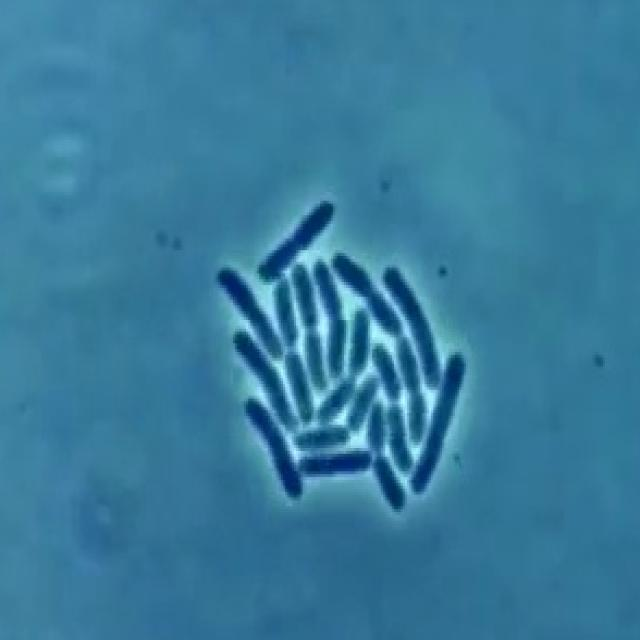

In [4]:
import cv2
from google.colab.patches import cv2_imshow

# Read image
img = cv2.imread("img.jpg")

# Display image
cv2_imshow(img)
cv2.waitKey(0)   # wait for key press
cv2.destroyAllWindows()

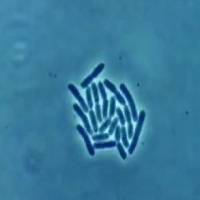

In [6]:
resized = cv2.resize(img, (200, 200))
img = cv2.imread("img.jpg")

cv2_imshow(resized)
cv2.waitKey(0)   # wait for key press
cv2.destroyAllWindows()

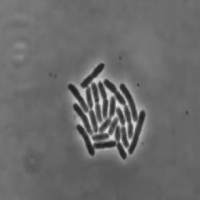

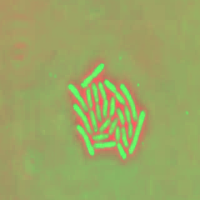

In [8]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # grayscale
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)    # HSV color space

resized1 = cv2.resize(gray, (200, 200))
resized2 = cv2.resize(hsv, (200, 200))

cv2_imshow(resized1)
cv2.waitKey(0)   # wait for key press
cv2.destroyAllWindows()

cv2_imshow(resized2)
cv2.waitKey(0)   # wait for key press
cv2.destroyAllWindows()

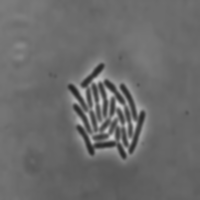

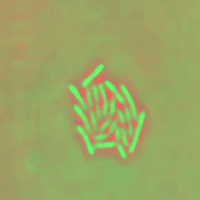

In [9]:
blur = cv2.GaussianBlur(resized1, (5,5), 0)  # Gaussian blur
median = cv2.medianBlur(resized2, 5)         # Median filter (good for salt & pepper noise)

cv2_imshow(blur)
cv2_imshow(median)
cv2.waitKey(0)   # wait for key press
cv2.destroyAllWindows()

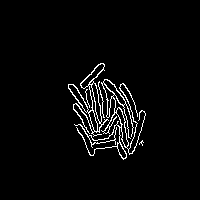

In [10]:
edge = cv2.Canny(resized1, 100, 200)  # Canny edge detection

cv2_imshow(edge)
cv2.waitKey(0)   # wait for key press
cv2.destroyAllWindows()


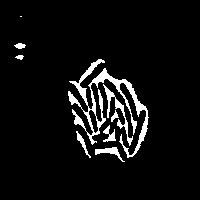

In [11]:
_, thresh = cv2.threshold(resized1, 127, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh)
cv2.waitKey(0)   # wait for key press
cv2.destroyAllWindows()

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,        # normalization (0-1)
    validation_split=0.2   # split 80% train, 20% validation
)

train_data = train_datagen.flow_from_directory(
    "/content/img.jpg",
    target_size=(128,128),
    batch_size=32,
    class_mode="binary",
    subset="training"
)

val_data = train_datagen.flow_from_directory(
    "/content/img.jpg",
    target_size=(128,128),
    batch_size=32,
    class_mode="binary",
    subset="validation"
)


NotADirectoryError: [Errno 20] Not a directory: '/content/img.jpg'

In [13]:
import os
import shutil

# Create dummy directories
base_dir = '/content/dummy_data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
class_a_train_dir = os.path.join(train_dir, 'class_a')
class_a_validation_dir = os.path.join(validation_dir, 'class_a')

os.makedirs(class_a_train_dir, exist_ok=True)
os.makedirs(class_a_validation_dir, exist_ok=True)

# Copy the existing image into the dummy directories (for demonstration)
shutil.copy('/content/img.jpg', class_a_train_dir)
shutil.copy('/content/img.jpg', class_a_validation_dir)

print("Dummy directory structure created at:", base_dir)

Dummy directory structure created at: /content/dummy_data


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,        # normalization (0-1)
    validation_split=0.2   # split 80% train, 20% validation
)

# Use the base_dir for flow_from_directory
train_data = train_datagen.flow_from_directory(
    base_dir, # Use the base directory containing train and validation subdirectories
    target_size=(128,128),
    batch_size=32,
    class_mode="binary", # Or "categorical" depending on your number of classes
    subset="training"
)

val_data = train_datagen.flow_from_directory(
    base_dir, # Use the base directory containing train and validation subdirectories
    target_size=(128,128),
    batch_size=32,
    class_mode="binary", # Or "categorical" depending on your number of classes
    subset="validation"
)

Found 2 images belonging to 2 classes.
Found 0 images belonging to 2 classes.
